# Indian Premier League EDA
___

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

In [3]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

---
## Data Imports
---

In [5]:
matches = pd.read_csv('IPL Matches 2008-2020.csv', index_col='id',parse_dates=['date'])
matches.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


---
## Win Loss Analysis
---

In [8]:
matches['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [9]:
matches[matches['result']=='tie']

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi


In [11]:
matches['winner'].value_counts().iplot(kind='bar', xTitle='Team', yTitle= 'Counts', title='Bar Chart of Win Results')

In [12]:
winslost= matches[['team1','team2','winner']]
winslost.head()

,team1,team2,winner
id,,,
335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders


In [13]:
winslost['loser'] = winslost.apply(lambda x: (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis=1)
winslost.head()

,team1,team2,winner,loser
id,,,,
335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore
335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Kings XI Punjab
335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals
335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians
335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers


In [15]:
wins= winslost['winner'].value_counts()
loser = winslost['loser'].value_counts()

In [18]:
wins.iplot(kind='bar', xTitle= 'Team', yTitle= 'Count', title = 'Most Wins')

In [19]:
loser.iplot(kind='bar', xTitle= 'Teams', yTitle = "Count", title= 'Most Losses')

In [21]:
mom=matches['player_of_match'].value_counts()

In [23]:
mom[:20].iplot(kind='bar', xTitle= "Player", yTitle= 'Times Awarded', title= 'Top 20 Player of Match Awards')

---
## Where Were Matches Hosted?
---

In [24]:
matches.head(3)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [25]:
city= matches['city'].value_counts()

In [26]:
city[:20].iplot(kind= 'bar')

### Venue Analysis
---

In [27]:
stadium = matches['venue'].value_counts()

In [28]:
stadium[:20].iplot(kind='bar')

# Rivalry Analysis
---
### Mumbai vs Chennai

In [29]:
def get_micsk(team1, team2):
    teams= ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [31]:
index = []
for row in matches.iterrows():
    flag = get_micsk(row[1]['team1'], row[1]['team2'])
    index.append(flag)

In [32]:
micsk = matches[index]

In [33]:
micsk['toss_decision'].value_counts().iplot(kind='bar')

In [34]:
micsk['toss_winner'].value_counts().iplot(kind='bar')

In [35]:
micsk['winner'].value_counts().iplot(kind='bar')

In [36]:
micsk['player_of_match'].value_counts()[:20].iplot(kind='bar')

In [37]:
micsk['result'].value_counts().iplot(kind='bar')

---
### Royal Challengers Bangalore vs Kings XI Punjab
---

In [38]:
def get_rcbk11(team1, team2):
    teams= ['Royal Challengers Bangalore', 'Kings XI Punjab']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [39]:
index = []
for row in matches.iterrows():
    flag = get_rcbk11(row[1]['team1'], row[1]['team2'])
    index.append(flag)

In [40]:
rcbk11 = matches[index]
rcbk11.head(10)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
336006,Bangalore,2008-05-05,S Sreesanth,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,SJ Davis,BR Doctrove
336016,Chandigarh,2008-05-12,SE Marsh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,9.0,N,NaN,BR Doctrove,I Shivram
392191,Durban,2009-04-24,RS Bopara,Kingsmead,1,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,wickets,7.0,N,NaN,BR Doctrove,TH Wijewardene
392204,Durban,2009-05-01,Yuvraj Singh,Kingsmead,1,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,8.0,N,NaN,HDPK Dharmasena,S Ravi
419112,Bangalore,2010-03-16,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,bat,Royal Challengers Bangalore,wickets,8.0,N,NaN,S Das,DJ Harper
419136,Chandigarh,2010-04-02,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,Royal Challengers Bangalore,wickets,6.0,N,NaN,BF Bowden,M Erasmus
501244,Bangalore,2011-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,85.0,N,NaN,Aleem Dar,RB Tiffin
501260,Dharamsala,2011-05-17,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,Kings XI Punjab,runs,111.0,N,NaN,Asad Rauf,AM Saheba
548331,Chandigarh,2012-04-20,CH Gayle,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,5.0,N,NaN,S Ravi,RJ Tucker


In [41]:
rcbk11['winner'].value_counts().iplot(kind= 'bar')

In [42]:
rcbk11['toss_winner'].value_counts().iplot(kind= 'bar')

In [43]:
rcbk11['toss_decision'].value_counts().iplot(kind= 'bar')

In [44]:
rcbk11['player_of_match'].value_counts()[:20].iplot(kind= 'bar')

In [45]:
rcbk11['venue'].value_counts()[:15].iplot(kind= 'bar')

---
## Season Analysis
___

In [46]:
matches.head(3)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


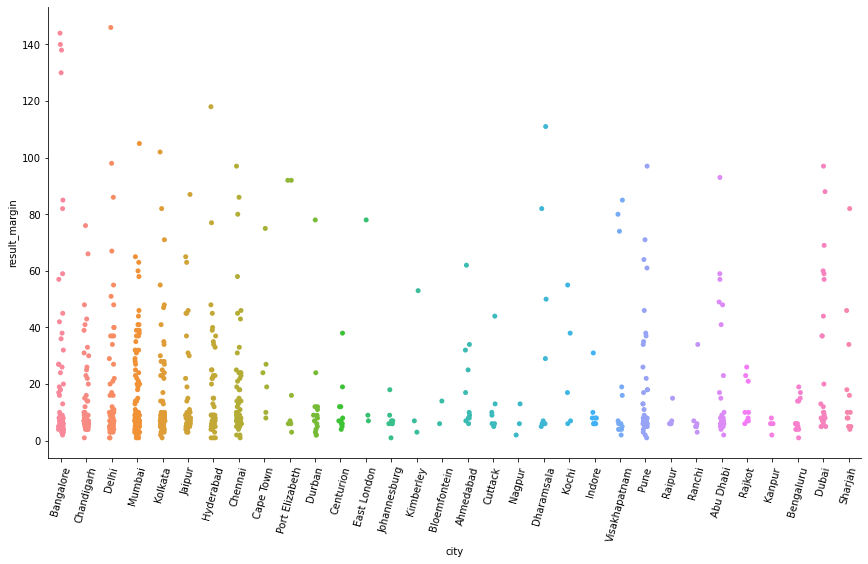

In [55]:
sns.catplot(data= matches, x= 'city',y = 'result_margin', height = 7,aspect=1.75)
plt.xticks(rotation=75)
plt.show()

---
## Ball Analysis
---

In [56]:
ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [57]:
ball.batsman.value_counts()[:20].iplot(kind= 'bar')

In [58]:
ball.bowler.value_counts()[:20].iplot(kind= 'bar')

In [60]:
ball.non_striker.value_counts()[:20].iplot(kind= 'bar')

In [62]:
ball.dismissal_kind.value_counts().iplot(kind='bar')

In [63]:
ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [64]:
ball.extras_type.value_counts()[:20].iplot(kind='bar')

In [65]:
ball.player_dismissed.value_counts()[:20].iplot(kind='bar')

In [66]:
runs =  ball.groupby('batting_team').sum()[['batsman_runs', 'total_runs']]
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,26953,28363
Deccan Chargers,10885,11463
Delhi Capitals,5074,5296
Delhi Daredevils,23011,24285
Gujarat Lions,4627,4856
Kings XI Punjab,28496,30017
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,27766,29383
Mumbai Indians,30547,32286


In [69]:
runs.sort_values('total_runs',ascending=False).iplot(kind='bar')

In [70]:
batsman = ball.groupby('batsman')['batsman_runs'].sum()
batsman = batsman.sort_values(ascending=False)

In [72]:
batsman[:20].iplot(kind='bar')

In [73]:
bowling = ball.groupby('bowling_team').sum()[['batsman_runs', 'total_runs']]
bowling = bowling.sort_values('total_runs', ascending = False)

In [74]:
bowling[:20].iplot(kind='bar')